## classification for numbers in range 0,9

In [2]:
import tensorflow as tf

In [3]:
import numpy as np

In [4]:
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()

In [5]:
x_train = x_train/ 255.0
x_test = x_test/ 255.0

x_train = x_train.reshape((-1, 28, 28, 1))  
x_test = x_test.reshape((-1, 28, 28, 1))


In [6]:
y_train_encoded = tf.keras.utils.to_categorical(y_train, num_classes=10)
y_test_encoded = tf.keras.utils.to_categorical(y_test, num_classes=10)

In [34]:
model=tf.keras.models.Sequential( )
model.add(tf.keras.layers.Conv2D(32,(2,2),activation='relu',input_shape=x_train.shape[1:]))
model.add(tf.keras.layers.MaxPooling2D())
model.add(tf.keras.layers.Conv2D(64,(3,3),activation='relu',input_shape=x_train.shape[1:]))
model.add(tf.keras.layers.MaxPooling2D())
model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dense(128,activation='relu'))
model.add(tf.keras.layers.Dense(128,activation='relu'))
model.add(tf.keras.layers.Dense(10,activation='softmax'))
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
model.fit(x_train,y_train,epochs=10)
model.save('handwritten.model')

Epoch 1/10
1875/1875 [==============================] - 30s 15ms/step - loss: 0.1488 - accuracy: 0.9532
Epoch 2/10
1875/1875 [==============================] - 40s 21ms/step - loss: 0.0495 - accuracy: 0.9843
Epoch 3/10
1875/1875 [==============================] - 41s 22ms/step - loss: 0.0341 - accuracy: 0.9894
Epoch 4/10
1875/1875 [==============================] - 84s 45ms/step - loss: 0.0250 - accuracy: 0.9918
Epoch 5/10
1875/1875 [==============================] - 60s 32ms/step - loss: 0.0191 - accuracy: 0.9938
Epoch 6/10
1875/1875 [==============================] - 36s 19ms/step - loss: 0.0148 - accuracy: 0.9956
Epoch 7/10
1875/1875 [==============================] - 51s 27ms/step - loss: 0.0130 - accuracy: 0.9956
Epoch 8/10
1875/1875 [==============================] - 57s 30ms/step - loss: 0.0111 - accuracy: 0.9965
Epoch 9/10
1875/1875 [==============================] - 40s 21ms/step - loss: 0.0100 - accuracy: 0.9970
Epoch 10/10
1875/1875 [==============================] - 32s 17m

INFO:tensorflow:Assets written to: handwritten.model\assets


In [35]:
loss, accuracy = model.evaluate(x_test, y_test)

313/313 [==============================] - 4s 13ms/step - loss: 0.0388 - accuracy: 0.9902


In [36]:
import cv2
import numpy as np

# Load the custom image
image=cv2.imread("C:/Users/sriyo/Pictures/Screenshots/Screenshot 2024-04-10 231524.png")


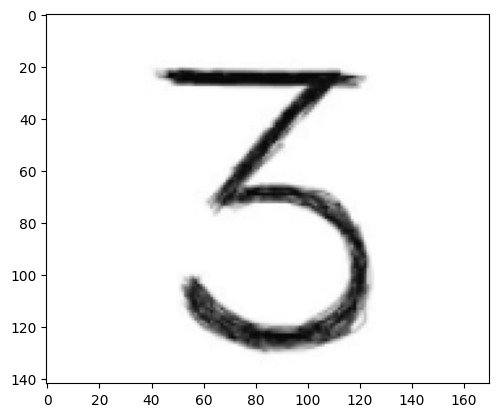

In [37]:
import matplotlib.pyplot as plt
plt.imshow(image)

In [38]:

# Convert the image to grayscale
gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# Resize the image to match the input size expected by the model
resized_image = cv2.resize(gray_image, (28, 28))

# Normalize pixel values to range [0, 1]
normalized_image = resized_image.astype('float32') / 255.0

input_image = np.expand_dims(normalized_image, axis=0)

predictions = model.predict(input_image)

# Interpret predictions
predicted_class = np.argmax(predictions)  # Get the index of the class with the highest probability
print(f"Predicted class: {predicted_class}")

1/1 [==============================] - 0s 169ms/step
Predicted class: 8


In [39]:
import cv2
import numpy as np

# Load the custom image
image=cv2.imread("Screenshot 2024-04-11 125341.png")


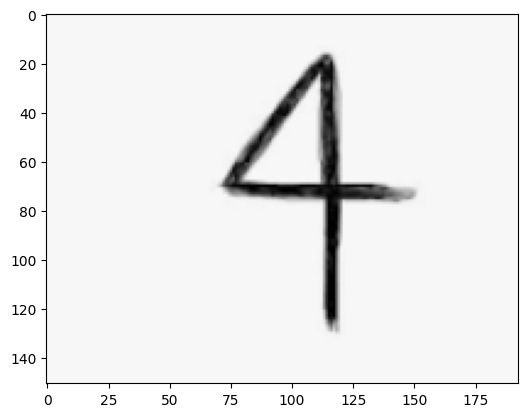

In [40]:
plt.imshow(image)

In [41]:

# Convert the image to grayscale
gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# Resize the image to match the input size expected by the model
resized_image = cv2.resize(gray_image, (28, 28))

# Normalize pixel values to range [0, 1]
normalized_image = resized_image.astype('float32') / 255.0

input_image = np.expand_dims(normalized_image, axis=0)

predictions = model.predict(input_image)

# Interpret predictions
predicted_class = np.argmax(predictions)  # Get the index of the class with the highest probability
print(f"Predicted class: {predicted_class}")

1/1 [==============================] - 0s 46ms/step
Predicted class: 8


In [42]:
import cv2
import numpy as np

# Load the custom image
image=cv2.imread("C:/Users/sriyo/Pictures/Screenshots/Screenshot 2024-04-10 231559.png")

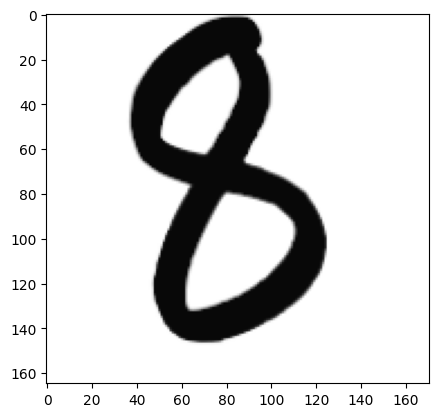

In [43]:
plt.imshow(image)

In [44]:

# Convert the image to grayscale
gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# Resize the image to match the input size expected by the model
resized_image = cv2.resize(gray_image, (28, 28))

# Normalize pixel values to range [0, 1]
normalized_image = resized_image.astype('float32') / 255.0

input_image = np.expand_dims(normalized_image, axis=0)

predictions = model.predict(input_image)

# Interpret predictions
predicted_class = np.argmax(predictions)  # Get the index of the class with the highest probability
print(f"Predicted class: {predicted_class}")

1/1 [==============================] - 0s 71ms/step
Predicted class: 6
